# MultiLinear Regression

#### Consider only the below columns and prepare a prediction model for predicting Price.
#### Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]

## Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings("ignore")

## Import Data

In [2]:
Toyota_Data=pd.read_csv("C:\\Users\\shine\\Downloads\\ToyotaCorolla.csv", encoding="unicode_escape")

### Filtering the Features

In [3]:
Toyota_Data.columns

Index(['Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Color', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Tow_Bar'],
      dtype='object')

In [4]:
Filtered_Data=Toyota_Data[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]
Filtered_Data.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


## Data Understanding

In [5]:
Filtered_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


#### No null entries in the dataset

In [6]:
print("Unique values in Doors Feature  :",Filtered_Data.Doors.unique())
print("Unique values in Gears Feature  :",Filtered_Data["Gears"].unique())
print("Unique values in HP Feature     :",Filtered_Data.HP.unique())
print("Unique values in Tax Feature    :",Filtered_Data.Quarterly_Tax.unique())
print("Unique values in CC Feature     :",Filtered_Data.cc.unique())
print("Unique values in Age Feature    :",Filtered_Data.Age_08_04.unique())
print("Unique values in Weight Feature :",Filtered_Data.Weight.unique())

Unique values in Doors Feature  : [3 5 4 2]
Unique values in Gears Feature  : [5 6 3 4]
Unique values in HP Feature     : [ 90 192  69 110  97  71 116  98  86  72 107  73]
Unique values in Tax Feature    : [210 100 185  85  19 234  69 283  64 197 163  72  40]
Unique values in CC Feature     : [ 2000  1800  1900  1600  1400  1598 16000  1995  1398  1300  1587  1975
  1332]
Unique values in Age Feature    : [23 24 26 30 32 27 25 22 31 28 29 20 19 16 17 11 18 13 14  4  8  7 15 10
 12  9  6  2  1 43 38 40 44 41 37 39 42 35 34 33 36 53 51 54 45 55 48 52
 49 56 50 47 46 58 68 59 62 65 67 64 60 61 66 57 63 73 79 78 74 77 69 80
 76 70 71 75 72]
Unique values in Weight Feature : [1165 1170 1245 1185 1105 1065 1120 1100 1255 1270 1110 1195 1180 1075
 1130 1275 1060 1115 1265 1260 1125 1155 1045 1480 1320 1280 1135 1090
 1150 1085 1160 1205 1084 1140 1095 1025 1119 1080 1121 1615 1067 1040
 1030 1055 1050 1103 1070 1035 1015 1000 1078 1079 1109 1020 1010 1114
 1172 1094 1083]


#### Doors and Gears feature falls into categorical data. However the Datatype is "int64" so we proceed without label or onehot encoding. 

In [7]:
Filtered_Data.Doors.value_counts()

5    674
3    622
4    138
2      2
Name: Doors, dtype: int64

## Correlation Analysis

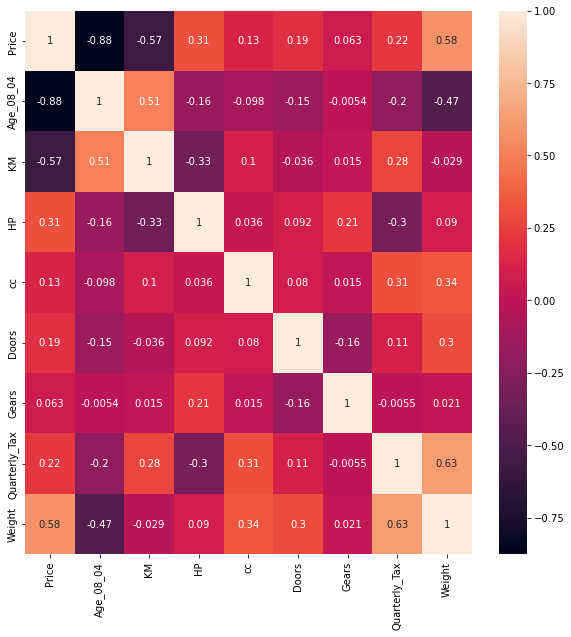

In [8]:
plt.figure(figsize=[10,10])
Corr_Data=Filtered_Data.corr()
sns.heatmap(data=Corr_Data, annot=True)
plt.show()

## Performing Assumptions Checks

### 1. Linearity Test

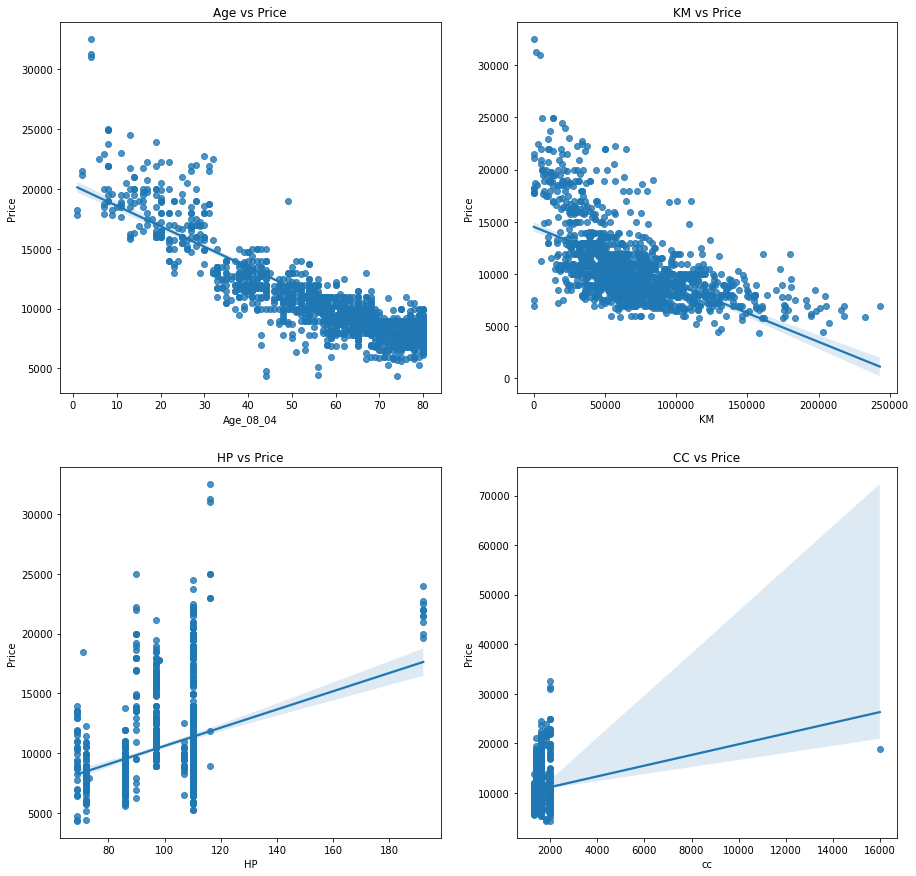

<Figure size 1080x1080 with 0 Axes>

In [9]:
Linearity_fig_1,axes=plt.subplots(2,2)
plt.figure(figsize=[15,15])

Linearity_fig_1.set_figheight(15)
Linearity_fig_1.set_figwidth(15)

sns.regplot(x="Age_08_04", y="Price", data=Filtered_Data,ax=axes[0,0])
axes[0,0].set_title("Age vs Price")

sns.regplot(x="KM", y="Price", data=Filtered_Data,ax=axes[0,1])
axes[0,1].set_title("KM vs Price")

sns.regplot(x="HP", y="Price", data=Filtered_Data,ax=axes[1,0])
axes[1,0].set_title("HP vs Price")

sns.regplot(x="cc", y="Price", data=Filtered_Data,ax=axes[1,1])
axes[1,1].set_title("CC vs Price")

plt.show()

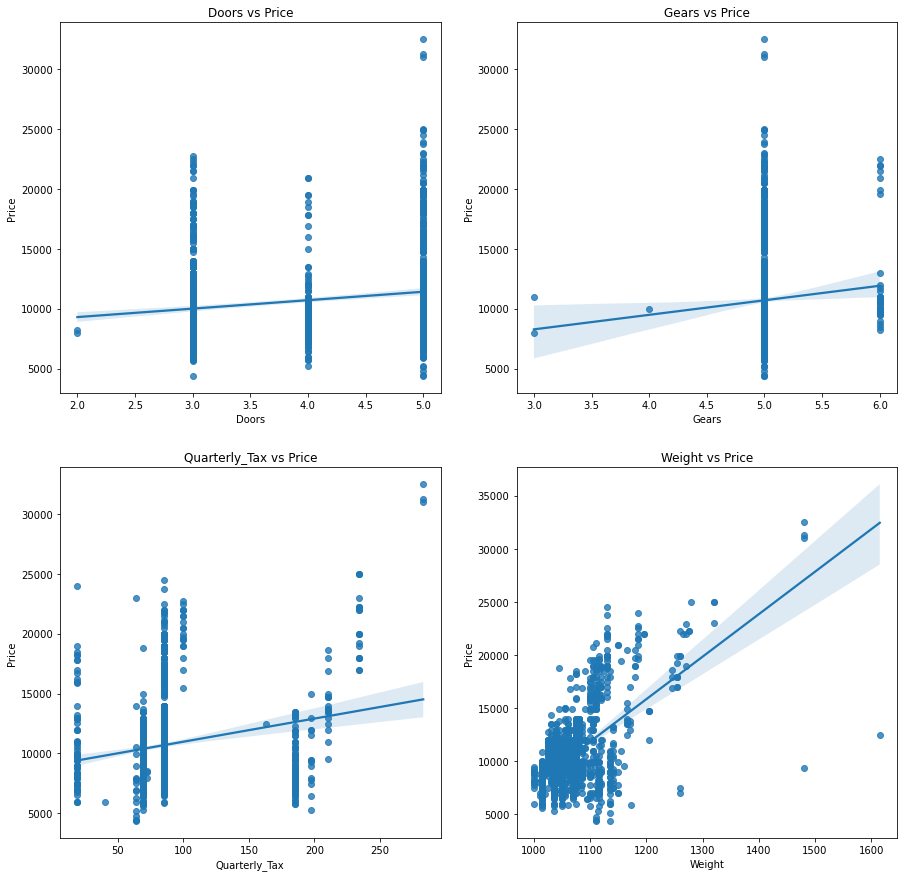

<Figure size 1080x1080 with 0 Axes>

In [10]:
Linearity_fig_2,axes2=plt.subplots(2,2)
plt.figure(figsize=[15,15])

Linearity_fig_2.set_figheight(15)
Linearity_fig_2.set_figwidth(15)

sns.regplot(x="Doors", y="Price", data=Filtered_Data,ax=axes2[0,0])
axes2[0,0].set_title("Doors vs Price")

sns.regplot(x="Gears", y="Price", data=Filtered_Data,ax=axes2[0,1])
axes2[0,1].set_title("Gears vs Price")

sns.regplot(x="Quarterly_Tax", y="Price", data=Filtered_Data,ax=axes2[1,0])
axes2[1,0].set_title("Quarterly_Tax vs Price")

sns.regplot(x="Weight", y="Price", data=Filtered_Data,ax=axes2[1,1])
axes2[1,1].set_title("Weight vs Price")

plt.show()

#### Linearity Test Failed

### Normality Test

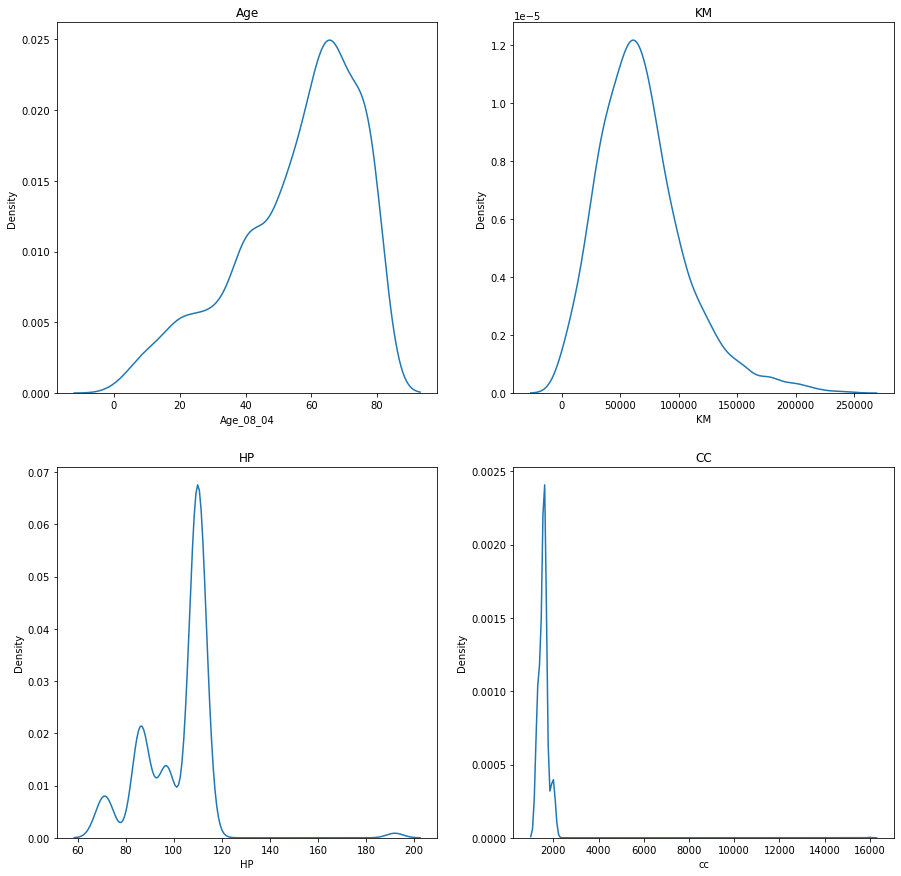

<Figure size 1080x1080 with 0 Axes>

In [11]:
Normality_fig_1,axes3=plt.subplots(2,2)
plt.figure(figsize=[15,15])

Normality_fig_1.set_figheight(15)
Normality_fig_1.set_figwidth(15)

sns.kdeplot(x="Age_08_04", data=Filtered_Data,ax=axes3[0,0])
axes3[0,0].set_title("Age")

sns.kdeplot(x="KM", data=Filtered_Data,ax=axes3[0,1])
axes3[0,1].set_title("KM")

sns.kdeplot(x="HP", data=Filtered_Data,ax=axes3[1,0])
axes3[1,0].set_title("HP")

sns.kdeplot(x="cc", data=Filtered_Data,ax=axes3[1,1])
axes3[1,1].set_title("CC")

plt.show()

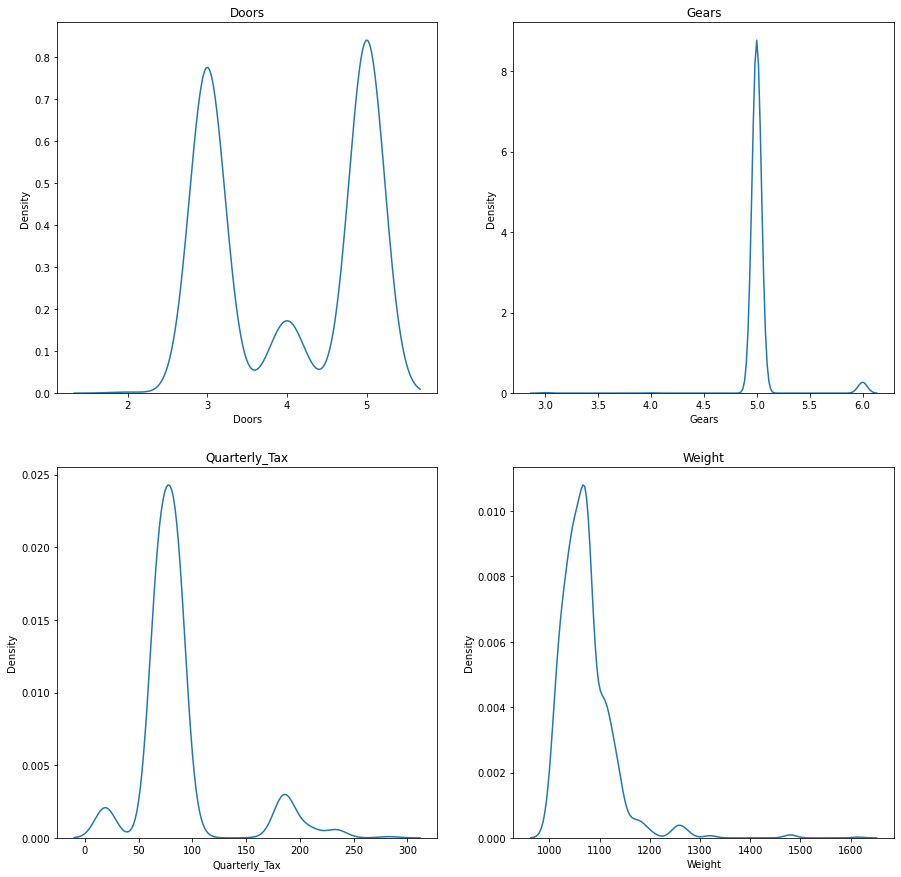

<Figure size 1080x1080 with 0 Axes>

In [12]:
Normality_fig_2,axes4=plt.subplots(2,2)
plt.figure(figsize=[15,15])

Normality_fig_2.set_figheight(15)
Normality_fig_2.set_figwidth(15)

sns.kdeplot(x="Doors", data=Filtered_Data,ax=axes4[0,0])
axes4[0,0].set_title("Doors")

sns.kdeplot(x="Gears", data=Filtered_Data,ax=axes4[0,1])
axes4[0,1].set_title("Gears")

sns.kdeplot(x="Quarterly_Tax", data=Filtered_Data,ax=axes4[1,0])
axes4[1,0].set_title("Quarterly_Tax")

sns.kdeplot(x="Weight", data=Filtered_Data,ax=axes4[1,1])
axes4[1,1].set_title("Weight")

plt.show()

#### Normality Test failed

#### 3. No Multicollinearity found from the Heatmap plotted using correlation matrix.
#### 4. No Auto Regression(No inputs are showing timedate format. So it passed.)

## Model Building

In [13]:
X=Filtered_Data[["Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]
y=Filtered_Data[["Price"]]

In [14]:
from sklearn.linear_model import LinearRegression
Linear_model=LinearRegression()

Linear_model.fit(X,y)

LinearRegression()

## Model Testing

In [15]:
Linear_model.predict(X)

array([[16812.58050518],
       [16272.35518581],
       [16800.73245987],
       ...,
       [ 8454.29800682],
       [ 8578.03812148],
       [10402.43833285]])

## Model Evaluation

In [16]:
Linear_model.score(X,y)

0.8637627463428192

In [17]:
Evaluation=Filtered_Data
Evaluation["Predicted_y"]=Linear_model.predict(X).round(1)
Evaluation["Error"]=Evaluation["Predicted_y"]-Evaluation["Price"]
Evaluation.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight,Predicted_y,Error
0,13500,23,46986,90,2000,3,5,210,1165,16812.6,3312.6
1,13750,23,72937,90,2000,3,5,210,1165,16272.4,2522.4
2,13950,24,41711,90,2000,3,5,210,1165,16800.7,2850.7
3,14950,26,48000,90,2000,3,5,210,1165,16426.5,1476.5
4,13750,30,38500,90,2000,3,5,210,1170,16222.4,2472.4


In [18]:
Linear_model.coef_

array([[-1.21658402e+02, -2.08171292e-02,  3.16809058e+01,
        -1.21100301e-01, -1.61664095e+00,  5.94319936e+02,
         3.94908076e+00,  1.69586318e+01]])

In [19]:
Linear_model.intercept_

array([-5573.10635791])

## Scaling

In [20]:
from sklearn.preprocessing import StandardScaler
Std_Scaler=StandardScaler()
Scaled_Data=Filtered_Data
Scaled_Data["Predicted_y"]=Linear_model.predict(X).round(1)
Scaled_Data=pd.DataFrame(Std_Scaler.fit_transform(Scaled_Data),columns=["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight","Predicted_y","Error"])
Scaled_Data["Scaled_Error"]=Scaled_Data["Predicted_y"]-Scaled_Data["Price"]
Scaled_Data["Error"]=Evaluation["Error"]

In [21]:
Scaled_Data.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight,Predicted_y,Error,Scaled_Error
0,0.763763,-1.771966,-0.574695,-0.768042,0.997419,-1.085139,-0.140425,2.98868,1.758561,1.804850,3312.6,1.041087
1,0.832715,-1.771966,0.117454,-0.768042,0.997419,-1.085139,-0.140425,2.98868,1.758561,1.644538,2522.4,0.811824
2,0.887877,-1.718184,-0.715386,-0.768042,0.997419,-1.085139,-0.140425,2.98868,1.758561,1.801319,2850.7,0.913442
3,1.163685,-1.610620,-0.547650,-0.768042,0.997419,-1.085139,-0.140425,2.98868,1.758561,1.690270,1476.5,0.526584
4,0.832715,-1.395491,-0.801028,-0.768042,0.997419,-1.085139,-0.140425,2.98868,1.853577,1.629700,2472.4,0.796985


## Homoscadasticity Check

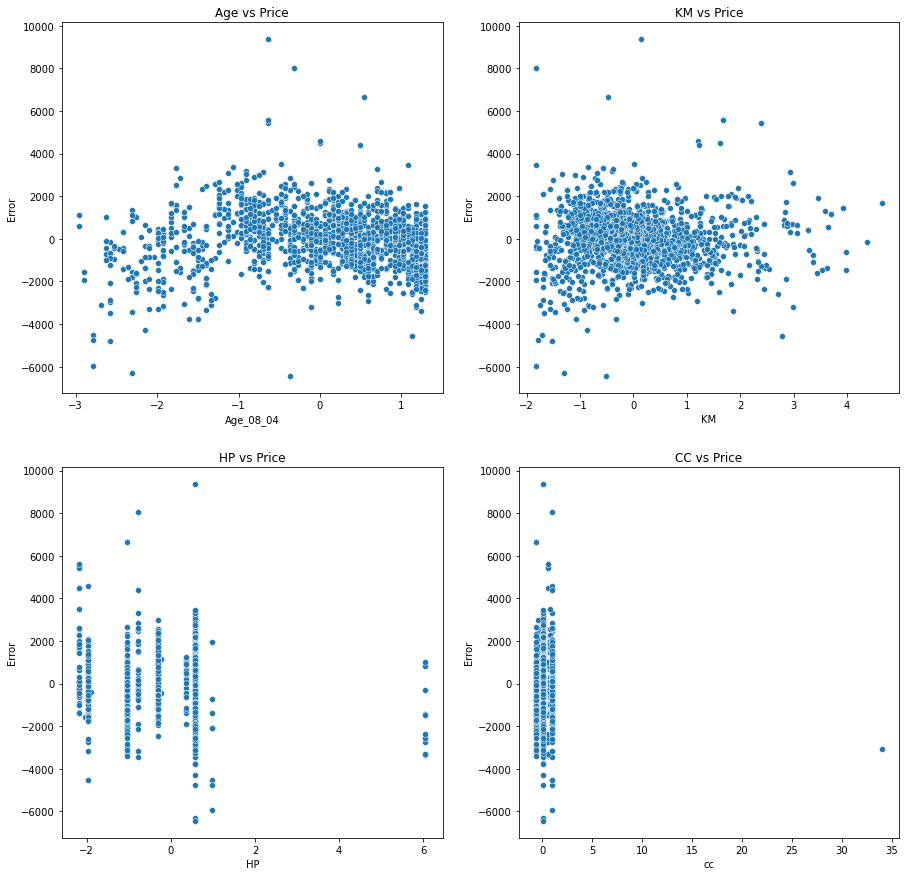

<Figure size 1080x1080 with 0 Axes>

In [22]:
H_fig_1,axes6=plt.subplots(2,2)
plt.figure(figsize=[15,15])

H_fig_1.set_figheight(15)
H_fig_1.set_figwidth(15)

sns.scatterplot(x="Age_08_04", y="Error", data=Scaled_Data,ax=axes6[0,0])
axes6[0,0].set_title("Age vs Price")

sns.scatterplot(x="KM", y="Error", data=Scaled_Data,ax=axes6[0,1])
axes6[0,1].set_title("KM vs Price")

sns.scatterplot(x="HP", y="Error", data=Scaled_Data,ax=axes6[1,0])
axes6[1,0].set_title("HP vs Price")

sns.scatterplot(x="cc", y="Error", data=Scaled_Data,ax=axes6[1,1])
axes6[1,1].set_title("CC vs Price")

plt.show()

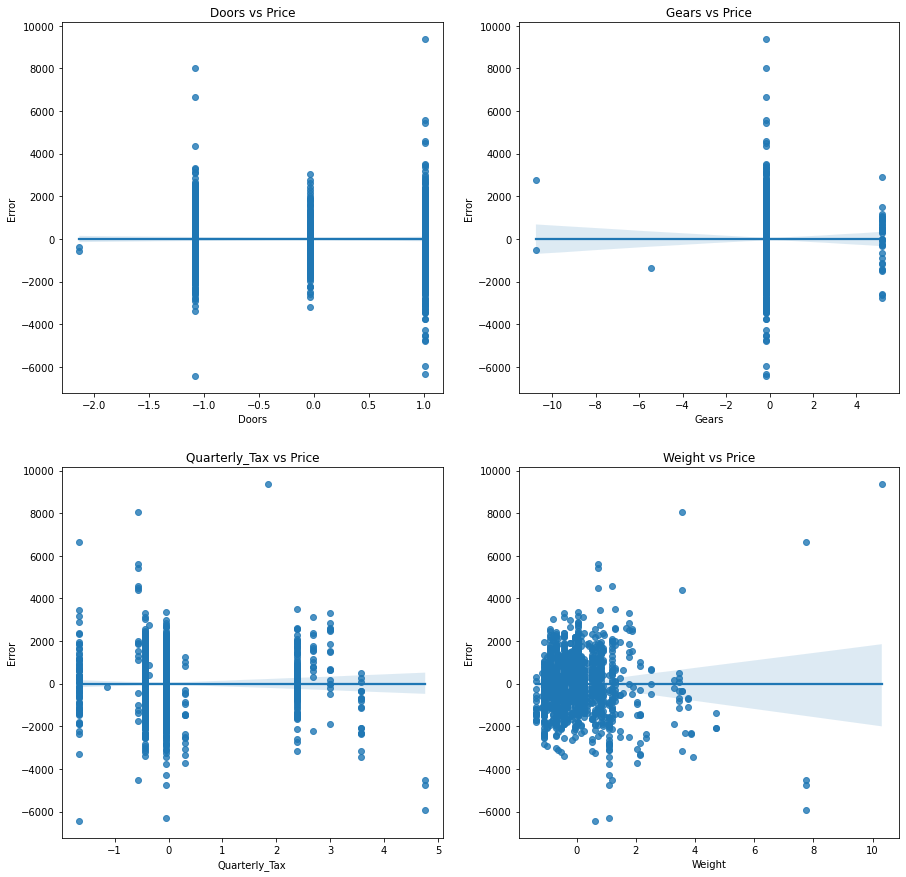

<Figure size 1080x1080 with 0 Axes>

In [23]:
H_fig_2,axes5=plt.subplots(2,2)
plt.figure(figsize=[15,15])

H_fig_2.set_figheight(15)
H_fig_2.set_figwidth(15)

sns.regplot(x="Doors", y="Error", data=Scaled_Data,ax=axes5[0,0])
axes5[0,0].set_title("Doors vs Price")

sns.regplot(x="Gears", y="Error", data=Scaled_Data,ax=axes5[0,1])
axes5[0,1].set_title("Gears vs Price")

sns.regplot(x="Quarterly_Tax", y="Error", data=Scaled_Data,ax=axes5[1,0])
axes5[1,0].set_title("Quarterly_Tax vs Price")

sns.regplot(x="Weight", y="Error", data=Scaled_Data,ax=axes5[1,1])
axes5[1,1].set_title("Weight vs Price")

plt.show()

### Homoscadasticity Check failed.

## Residual Mean across Fitted Line

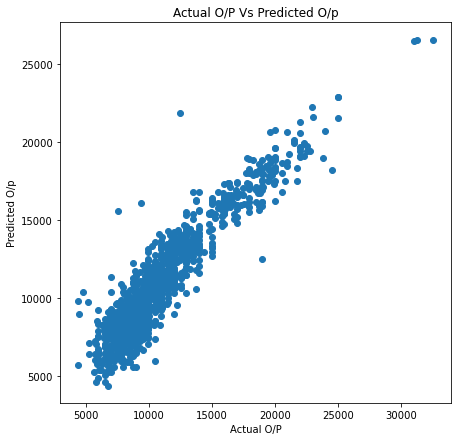

In [24]:
plt.figure(figsize=(7,7))
plt.scatter(x=y,y=Evaluation["Predicted_y"])
plt.title('Actual O/P Vs Predicted O/p')
plt.xlabel('Actual O/P')
plt.ylabel('Predicted O/p')
plt.show()

#### Zero Residual mean check also failed

## Model Optimization

In [25]:
Optimization_Data=Filtered_Data.copy()

### Removing outliers

In [26]:
# Using Statsmodel Library for influence plot

import statsmodels.api as sm
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [27]:
Linear_Stats_Model=smf.ols(formula="Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight", data=Optimization_Data).fit()
print("The R2 Value of Linear_Stats_Model is:",Linear_Stats_Model.rsquared)

The R2 Value of Linear_Stats_Model is: 0.8637627463428192


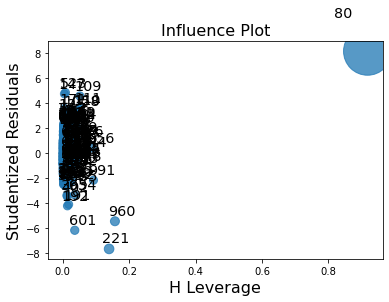

In [28]:
sm.graphics.influence_plot(Linear_Stats_Model)
plt.show()

In [29]:
# Dropping high leverage points

Optimization_Data=Optimization_Data.drop(index=[80,601,960,221])

Linear_Stats_Model_Inf=smf.ols(formula="Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight", data=Optimization_Data).fit()
print("The R2 Value of Linear_Stats_Model_Inf is:",Linear_Stats_Model_Inf.rsquared)
Optimization_Data.shape

The R2 Value of Linear_Stats_Model_Inf is: 0.8894191849749751


(1432, 11)

In [30]:
# Dropping Data points with high cook's distance.

Cooks_dis,Un=Linear_Stats_Model_Inf.get_influence().cooks_distance

In [31]:
k = 8
n = 1432
leverage_cutoff = 2*((k + 1)/n)
Optimization_Data["Cook's Distance"]=Cooks_dis

In [32]:
Optimized_Data=Optimization_Data[Optimization_Data["Cook's Distance"]<leverage_cutoff]

In [33]:
Optimized_Data.shape

(1415, 12)

In [34]:
Optimized_Data.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight,Predicted_y,Error,Cook's Distance
0,13500,23,46986,90,2000,3,5,210,1165,16812.6,3312.6,0.007167
1,13750,23,72937,90,2000,3,5,210,1165,16272.4,2522.4,0.003711
2,13950,24,41711,90,2000,3,5,210,1165,16800.7,2850.7,0.005134
3,14950,26,48000,90,2000,3,5,210,1165,16426.5,1476.5,0.000950
4,13750,30,38500,90,2000,3,5,210,1170,16222.4,2472.4,0.004091


### Transforming Necessary Features and comparing with metrics.

Since there is no visible collinearity between the features r2 metric is chosen for comparison.

Focusing our transformation on features of Age, KM and Gears as they have high correlation with the output.

In [35]:
import numpy as np

Linear_Stats_Model=smf.ols(formula="Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight", data=Optimized_Data).fit()
print("The R2 Value of Linear_Stats_Model   is :",Linear_Stats_Model.rsquared)

Linear_Stats_Model_1=smf.ols(formula="Price~np.cbrt(Age_08_04)+np.cbrt(KM)+HP+cc+Doors+np.cbrt(Gears)+Quarterly_Tax+Weight", data=Optimized_Data).fit()
print("The R2 Value of Linear_Stats_Model_1 is :",Linear_Stats_Model_1.rsquared)

Linear_Stats_Model_2=smf.ols(formula="Price~np.cbrt(Age_08_04)+KM+HP+cc+Doors+np.cbrt(Gears)+Quarterly_Tax+Weight", data=Optimized_Data).fit()
print("The R2 Value of Linear_Stats_Model_2 is :",Linear_Stats_Model_2.rsquared)

Linear_Stats_Model_3=smf.ols(formula="Price~np.cbrt(Age_08_04)+KM+HP+np.cbrt(cc)+Doors+Gears+Quarterly_Tax+Weight", data=Optimized_Data).fit()
print("The R2 Value of Linear_Stats_Model_3 is :",Linear_Stats_Model_3.rsquared)

Linear_Stats_Model_4=smf.ols(formula="Price~np.cbrt(Age_08_04)+KM+HP+np.cbrt(cc)+Doors+Gears+np.cbrt(Quarterly_Tax)+Weight", data=Optimized_Data).fit()
print("The R2 Value of Linear_Stats_Model_4 is :",Linear_Stats_Model_4.rsquared)

The R2 Value of Linear_Stats_Model   is : 0.8984351517627537
The R2 Value of Linear_Stats_Model_1 is : 0.8962181443076146
The R2 Value of Linear_Stats_Model_2 is : 0.9026858171315083
The R2 Value of Linear_Stats_Model_3 is : 0.9029164260658045
The R2 Value of Linear_Stats_Model_4 is : 0.9034599417542946


#### Trying other Transformations

In [36]:
Linear_Stats_Model_4_Sqrt=smf.ols(formula="Price~np.sqrt(Age_08_04)+KM+HP+np.sqrt(cc)+Doors+Gears+np.sqrt(Quarterly_Tax)+Weight", data=Optimized_Data).fit()
print("The R2 Value of Linear_Stats_Model_4_sqrt is :",Linear_Stats_Model_4_Sqrt.rsquared)

Linear_Stats_Model_4_log=smf.ols(formula="Price~np.log(Age_08_04)+KM+HP+np.log(cc)+Doors+Gears+np.log(Quarterly_Tax)+Weight", data=Optimized_Data).fit()
print("The R2 Value of Linear_Stats_Model_4_log is :",Linear_Stats_Model_4_log.rsquared)


The R2 Value of Linear_Stats_Model_4_sqrt is : 0.9057441439958717
The R2 Value of Linear_Stats_Model_4_log is : 0.8830286464868613


## Model Selection

#### Linear_Stats_Model_4_Sqrt is choosen as it has the best r2 score among all other models.

In [37]:
Linear_Stats_Model_4_Sqrt.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     1689.
Date:                Fri, 23 Sep 2022   Prob (F-statistic):               0.00
Time:                        00:28:08   Log-Likelihood:                -11887.
No. Observations:                1415   AIC:                         2.379e+04
Df Residuals:                    1406   BIC:                         2.384e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept              -2737.7923   1303.116     -2.101      0.036   -5294.053    -181.531
np.sqrt(Age_08_04)     -1513.9056     29.856    -50.707      0.000   -1572.473   -1455.339
KM                        -0.0164      0.001    -15.241      0.000      -0.019      -0.014
HP                        31.4144      2.513     12.500      0.000      26.485      36.344
np.sqrt(cc)             -230.3198     21.365    -10.780      0.000    -272.230    -188.410
Doors                    -91.9343     33.560     -2.739      0.006    -157.768     -26.101
Gears                    493.2028    170.478      2.893      0.004     158.784     827.622
np.sqrt(Quarterly_Tax)    81.5897     22.951      3.555      0.000      36.567     126.612
Weight                    26.8477      1.204     22.291      0.000      24.485      29.210
==============================================================================
Omnibus:                       15.921   Durbin-Watson:                   1.847
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.979
Skew:                           0.177   Prob(JB):                     7.57e-05
Kurtosis:                       3.444   Cond. No.                     3.54e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.54e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Model Deployment

In [38]:
from pickle import dump,load
dump(Linear_Stats_Model_4_Sqrt,open('Intel_On_ToyotoPrice.pkl','wb'))

In [39]:
Loaded_Int=load(open('Intel_On_ToyotoPrice.pkl','rb'))
Loaded_Int.predict(X)

0       16407.857809
1       15981.984496
2       16338.267818
3       15932.219391
4       15649.790758
            ...     
1431     9133.754933
1432     8620.145855
1433     8742.224288
1434     8834.017689
1435    10577.331498
Length: 1436, dtype: float64